In [25]:
import matplotlib.pyplot as plt

from error_generators import *
from IPython.display import display

from scipy.linalg import expm, logm

In [4]:
from pygsti.modelpacks import smq1Q_XYZI as std
target_model = std.target_model()

In [80]:
meas_0 = target_model[('Mdefault')]['0'].to_dense()
meas_1 = target_model[('Mdefault')]['1'].to_dense()
rho0 = target_model['rho0']
rho0.depolarize(1)
rho0 = rho0.to_dense()
mat_Gx = target_model[('Gxpi2', 0)].to_dense()

In [81]:
print(rho0)

[0.70710678 0.         0.         0.        ]


Consider a gate set that consists of a rotation of $\pi/2$ about the $X$ axis, and native state prep in all zeros and measurement in computational basis. Then, assert only uniform depolarizing error on the native state prep of the form $\exp(\theta_0 dP)$ where $dP$ is the generator of depolarizing error (= $S_X + S_Y + S_Z$)

Furthermore, consider only the errors that can be amplified by application of the $X$ gate. These errors are
$$
    \{ H_X, S_X, A_{Y \wedge Z} \}
$$
which defines the center of $H_X$.

Now, consider the effect of repeated application of $G_X$. If we assume a form for the circuit
$$
    F_p \equiv \bigg( \exp({\theta_1 dP + \theta_2 H_X + \theta_3 S_X + \theta_4 A_{Y \wedge Z} ) \tilde{G}_X \bigg) )^p \equiv (\exp( \theta \cdot d \theta) \tilde{G}_X )^p
$$
then, because the error generator commutes with the gate, we find
$$
    F_p =  \exp( p \theta \cdot d \theta_x) \tilde{G}_X^p.
$$

Now, look at the effect on model predictions, a model prediction is of the form
$$
    h_p(\theta) \equiv \langle \langle 0, 1 \vert \exp( p \theta \cdot d \theta) \tilde{G}_X^p |0 \rangle \rangle.
$$
Consider variations:
$$
    \frac{1}{p} \frac{ d h_p}{d \theta} \bigg|_{\theta = 0} = \sum_i \theta_i \langle \langle 0, 1 \vert d \theta_i \tilde{G}_X^p |0 \rangle \rangle
$$
Write these out into a matrix $J \equiv $
$$
    \begin{bmatrix}
     \langle \langle 0, 1 \vert d \theta_1 \tilde{G}_X^1 |0 \rangle \rangle,  \langle \langle 0, 1 \vert d \theta_2 \tilde{G}_X^1 |0 \rangle \rangle, ...,  \langle \langle 0, 1 \vert d \theta_n \tilde{G}_X^1 |0 \rangle \rangle \\
     \langle \langle 0, 1 \vert d \theta_1 \tilde{G}_X^2 |0 \rangle \rangle,  \langle \langle 0, 1 \vert d \theta_2 \tilde{G}_X^2 |0 \rangle \rangle, ...,  \langle \langle 0, 1 \vert d \theta_n \tilde{G}_X^2 |0 \rangle \rangle \\
     \vdots \\
     \langle \langle 0, 1 \vert d \theta_1 \tilde{G}_X^p |0 \rangle \rangle,  \langle \langle 0, 1 \vert d \theta_2 \tilde{G}_X^p |0 \rangle \rangle, ...,  \langle \langle 0, 1 \vert d \theta_n \tilde{G}_X^p |0 \rangle \rangle \\
\end{bmatrix}
$$

In [82]:
def model_variation(meas_effect, prep_effect, gen_matrix, gate, gate_reps=1):
    """
    calculate
    \langle \langle 0, 1 \vert d \theta_1 \tilde{G}_X^1 |0 \rangle \rangle
    """
    return meas_effect@gen_matrix@np.linalg.matrix_power(gate, gate_reps)@prep_effect

In [83]:
egen = ErrorGen(1)
print([(idx, egen.vec[idx]) for idx in range(len(egen.vec))])


[(0, {H}^{X}_{Gq0}), (1, {H}^{Y}_{Gq0}), (2, {H}^{Z}_{Gq0}), (3, {S}^{X}_{Gq0}), (4, {C}^{XxY}_{Gq0}), (5, {A}^{XxY}_{Gq0}), (6, {C}^{XxZ}_{Gq0}), (7, {A}^{XxZ}_{Gq0}), (8, {S}^{Y}_{Gq0}), (9, {C}^{YxZ}_{Gq0}), (10, {A}^{YxZ}_{Gq0}), (11, {S}^{Z}_{Gq0})]


In [84]:
Hx = egen.vec[0]
display(Hx)
Sx = egen.vec[3]
display(Sx)
Sy = egen.vec[8]
display(Sy)
Sz = egen.vec[11]
display(Sz)
Ayz = egen.vec[10]
display(Ayz)

{H}^{X}_{Gq0}

{S}^{X}_{Gq0}

{S}^{Y}_{Gq0}

{S}^{Z}_{Gq0}

{A}^{YxZ}_{Gq0}

In [85]:
mat_Hx = egen.feature_of_param(Hx)
print(mat_Hx)
mat_Sx = egen.feature_of_param(Sx)
print(mat_Sx)
mat_Ayz = egen.feature_of_param(Ayz)
print(mat_Ayz)
mat_dP = egen.feature_of_param(Sx) + egen.feature_of_param(Sy) + egen.feature_of_param(Sz)
print(mat_dP)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -2.]
 [ 0.  0.  2.  0.]]
[[ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -2.  0.]
 [ 0.  0.  0. -2.]]
[[ 0.  0.  0.  0.]
 [-4.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0.  0.  0.]
 [ 0. -4.  0.  0.]
 [ 0.  0. -4.  0.]
 [ 0.  0.  0. -4.]]


In [86]:
powers = range(0, 3)
matrix_bases = [mat_Hx, mat_Sx, mat_Ayz, mat_dP]
jacobian = np.zeros((2*len(powers), len(matrix_bases)))

for id_p, p in enumerate(powers):
    for id_dp, mat in enumerate(matrix_bases):
        jacobian[2*id_p, id_dp] = model_variation(meas_0, rho0, mat, mat_Gx, p)
        jacobian[2*id_p+1, id_dp] = model_variation(meas_1, rho0, mat, mat_Gx, p)

In [87]:
np.linalg.matrix_rank(jacobian)

2

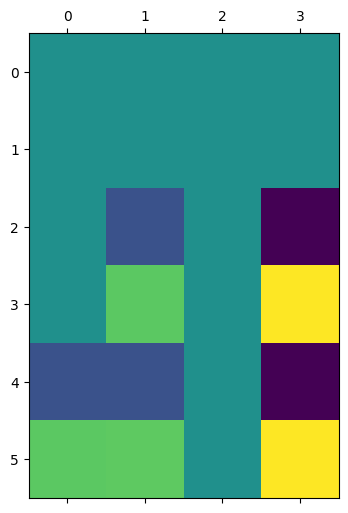

In [88]:
plt.matshow((jacobian))